# 2D GPR Derivatives Demo

In [1]:
import sys
sys.path.insert(0,'/home/emmanuel/projects/2019_sakame/src')

In [2]:
import numpy as np
from data.make_dataset import ToyData2D
from models.gp_demo import DemoGP
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

%load_ext autoreload
%autoreload 2

### Custom Function I

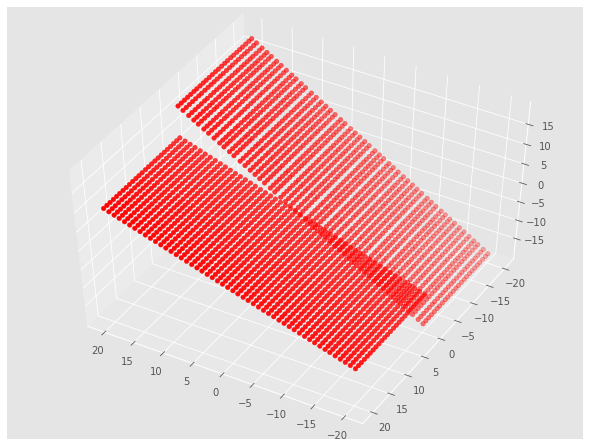

In [3]:
# Raw Data
data_model = ToyData2D(func='custom3', num_points=50)

data_model.plot_raw(demo=False);

X, y = data_model.regress_f()

#### Training and Testing

In [4]:
train_size = 0.6

xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, train_size=train_size, random_state=1234
)

/home/emmanuel/.conda/envs/sakame/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Train GP

In [5]:
%%time

demo_gpmodel = DemoGP()

demo_gpmodel.train(xtrain, ytrain)



CPU times: user 7min 9s, sys: 9.27 s, total: 7min 18s
Wall time: 15.7 s


In [6]:
ypred = demo_gpmodel.get_predictions(X, return_std=False)

In [7]:

sensX = demo_gpmodel.get_sensitivity(xtrain)

pt_sensX = demo_gpmodel.get_point_sensitivity(xtrain)

In [9]:
print(sensX.shape, pt_sensX.shape)

(2,) (1500,)


(1000, 2) (2500,)


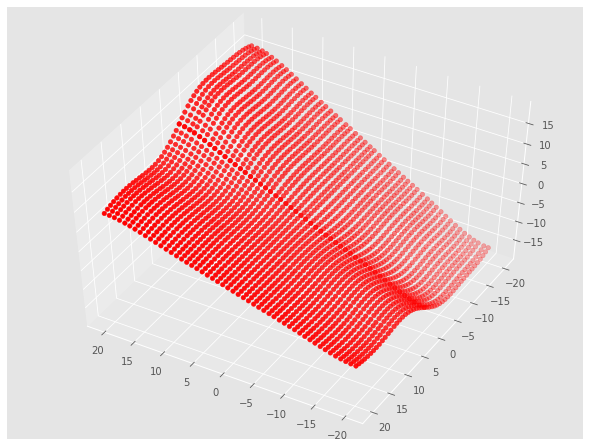

In [10]:
print(xtest.shape, ypred.shape)
data_model.plot_predictions(X, ypred, demo=False)

In [11]:
%%time
derX = demo_gpmodel.get_derivatives(X)


CPU times: user 2.78 s, sys: 46.1 ms, total: 2.83 s
Wall time: 119 ms


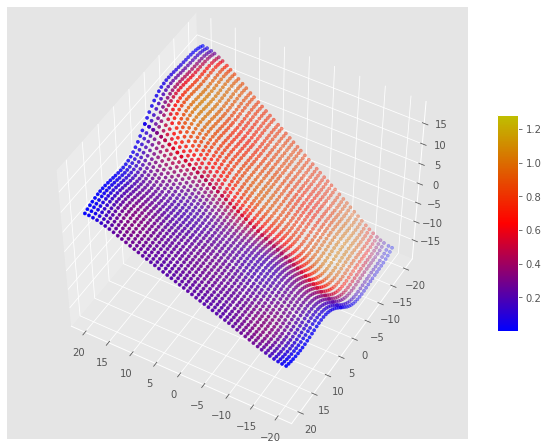

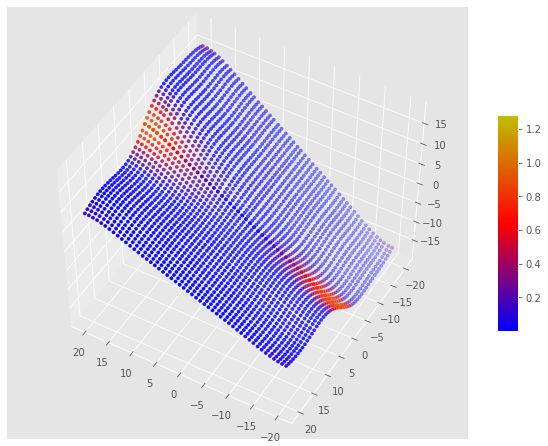

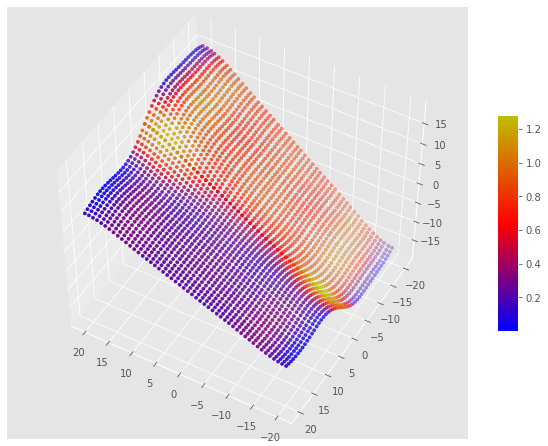

In [12]:
data_model.plot_sensitivity(X, ypred, derX, demo=False)